In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.signal import find_peaks


from scipy.ndimage import gaussian_filter1d



In [2]:
%store -r all_ws_clustered


In [3]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1593,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,1.533611
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,1.574685
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,1.724822
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,1.568101
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,2.120277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,2.840376
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,2.060717
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,2.658009
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,1.833412


In [4]:
all_ws_clustered.iloc[: ,:  -3]


,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.061334,0.054821,0.094158,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.089011,0.139586,0.090089,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.119727,0.099837,0.117549,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.056177,0.036667,0.069045,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.113334,0.057722,0.054529,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.143480,0.146509,0.106031,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.019539,0.023911,0.022255,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.073534,0.079672,0.034247,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.094275,0.135084,0.181331,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384


In [5]:
# pd has no rows attribute, use _, to ignore index, added iterrows() 
activity_sums = []
for _, row in all_ws_clustered.iloc[: , : -3].iterrows():
    activity_sums.append(sum(row))



In [6]:
activity_sums = np.array(activity_sums)
all_ws_clustered['activity_sums'] = activity_sums


In [7]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy,activity_sums
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,1.533611,197.016617
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,1.574685,182.980127
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,1.724822,210.802331
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,1.568101,197.424127
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,2.120277,253.449246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,2.840376,462.153412
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,2.060717,310.039398
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,2.658009,414.342537
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,1.833412,258.719369


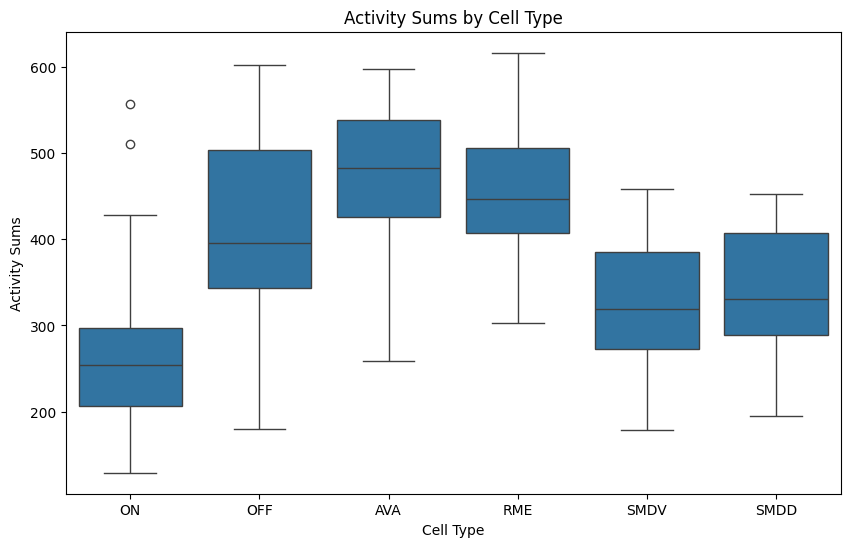

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='activity_sums', data=all_ws_clustered)
plt.title('Activity Sums by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Activity Sums')
plt.show()

In [20]:
# import stimulus
stimulus = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/inpfull_op50_SF.npz')
stimulus_concat = np.concatenate([stimulus['arr_0'], stimulus['arr_1'], stimulus['arr_2'], stimulus['arr_3'], stimulus['arr_4'], stimulus['arr_5'], stimulus['arr_6']], axis =1)
stimulus_concat = stimulus_concat.T
stim_0 = stimulus_concat[0, :].reshape(1600, 1)
stim_1 = stimulus_concat[2, :].reshape(1600, 1)

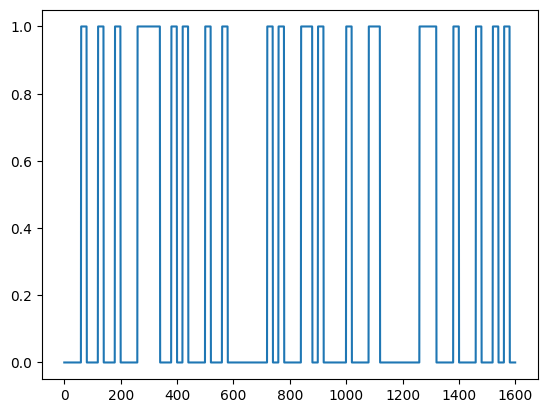

In [22]:
plt.plot(stim_1)

# Packets Definition

In [ ]:

# Create the packets dictionary with each cell from `all_ws_clustered` and its binned average activities
packets = defaultdict(lambda: defaultdict(list))

bins = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for cell_id, row in all_ws_clustered.iloc[:, :-4].iterrows():  # Exclude the last 4 columns (metadata)
    for bin_size in bins:
        for i in range(0, len(row), bin_size):
            chunk = row[i:i+bin_size]
            averages = np.mean(chunk)
            packets[cell_id][bin_size].append(averages)

# List of cell types to analyze in the desired order
cell_types = ['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD']

# Ordered by First Peak Onset 

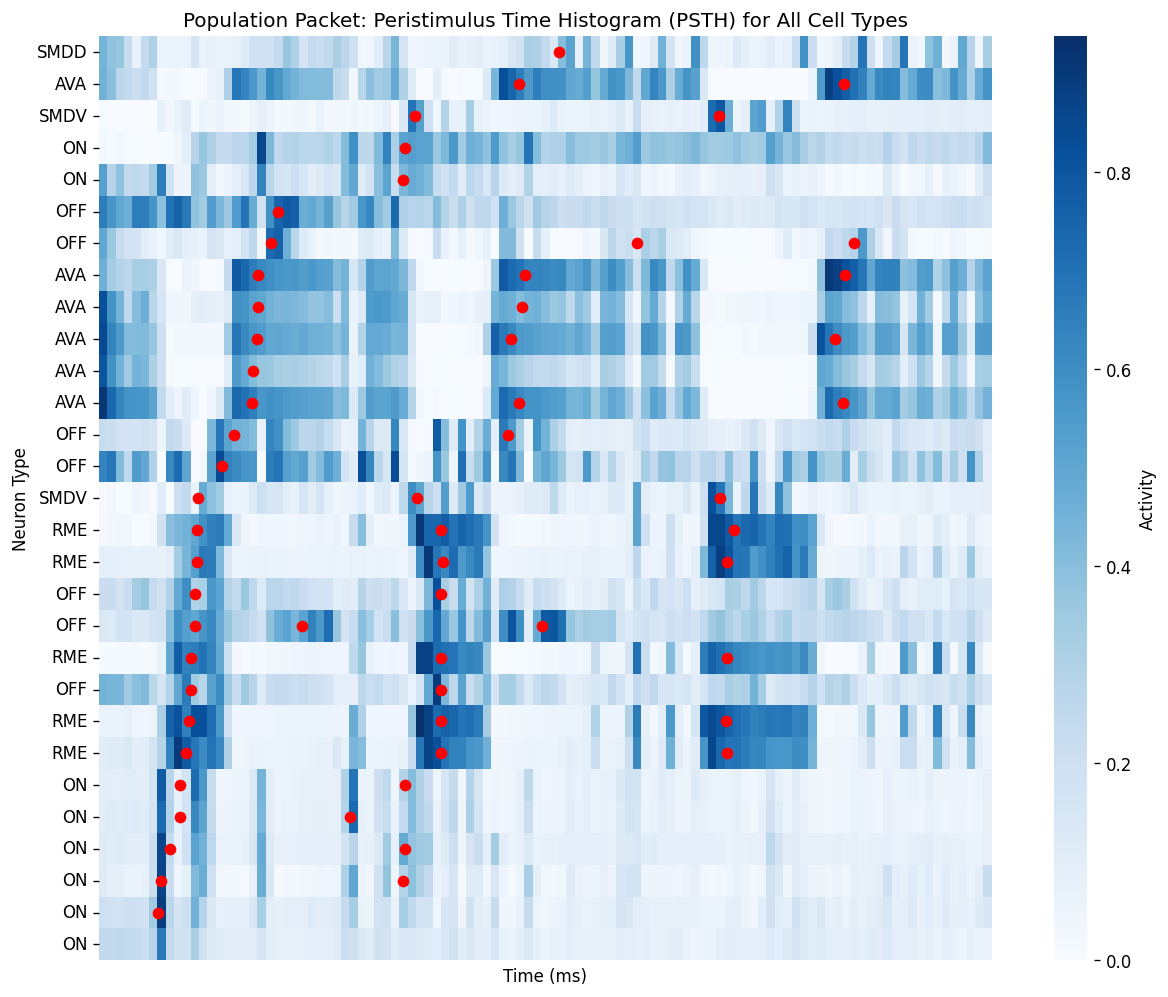

In [17]:


# Select bin size
selected_bin = 15

# Initialize lists to hold combined PSTH data and latency centers, and track y-axis positions
combined_psth_data = []
combined_latency_centers = []
cell_type_labels = []

# Loop through each cell type
for cell_type in cell_types:
    # Filter `all_ws_clustered` for the current cell type and worm ID 0
    filtered_type_df = all_ws_clustered[
        (all_ws_clustered['cell_type'] == cell_type) & (all_ws_clustered['worm_id'] == 0)
    ]

    # Check if there is data for the current cell type
    if filtered_type_df.empty:
        print(f"No data found for cell type: {cell_type}")
        continue

    # Process each cell in the filtered DataFrame for the current cell type
    psth_data = []
    latency_centers = []
    for cell_id in filtered_type_df.index:
        # Ensure the `packets` dictionary is accessed by the correct cell identifier
        if cell_id in packets and selected_bin in packets[cell_id]:
            averages = np.array(packets[cell_id][selected_bin])
            psth_data.append(averages)

            # Apply Gaussian smoothing to reduce noise
            smoothed_averages = gaussian_filter1d(averages, sigma=2)

            # Find peaks with strict thresholding
            peaks, _ = find_peaks(
                smoothed_averages,
                height=np.mean(smoothed_averages) + np.std(smoothed_averages),
                prominence=0.1,
                width=5
            )

            # Calculate center of mass for each detected peak region
            centers = []
            for peak in peaks:
                # Define a region around each peak based on packet width
                region_start = max(0, peak - 5)
                region_end = min(len(smoothed_averages), peak + 5)
                region_indices = np.arange(region_start, region_end)
                packet_averages = averages[region_indices]
                center = np.average(region_indices, weights=packet_averages)
                centers.append(center)

            latency_centers.append(centers)

    # Append each cell type's data to combined lists
    combined_psth_data.extend(psth_data)
    combined_latency_centers.extend(latency_centers)
    cell_type_labels.extend([cell_type] * len(psth_data))  # Track y-axis labels for each cell

# Convert combined data to a 2D array for heatmap plotting
combined_psth_data = np.array(combined_psth_data)

# Sort by cell type and then by first center of mass within each type
sorted_indices = np.argsort(cell_type_labels)  # First sort by cell type
sorted_indices = sorted_indices[np.argsort([combined_latency_centers[i][0] if combined_latency_centers[i] else 0 for i in sorted_indices])]  # Then by latency within each type
combined_psth_data_sorted = combined_psth_data[sorted_indices]
combined_latency_centers_sorted = [combined_latency_centers[i] for i in sorted_indices]
cell_type_labels_sorted = [cell_type_labels[i] for i in sorted_indices]

# Plot the heatmap for all cell types in one plot
plt.figure(figsize=(12, 10), dpi=120)
ax = sns.heatmap(combined_psth_data_sorted, cmap="Blues", cbar=True, yticklabels=cell_type_labels_sorted, xticklabels=False)
plt.gca().invert_yaxis()

plt.xlabel("Time (ms)")
plt.ylabel("Neuron Type")
plt.title("Population Packet: Peristimulus Time Histogram (PSTH) for All Cell Types")

# Overlay red dots for each center of mass (multiple packets)
for i, centers in enumerate(combined_latency_centers_sorted):
    for center in centers:
        plt.plot(center, i + 0.5, 'ro')  # Adjust to place the red dot at the center of each row

# Link colorbar to the heatmap with a smaller size
cbar = ax.collections[0].colorbar
cbar.set_label('Activity')
cbar.ax.set_aspect(30)  # Make the color bar thinner

plt.show()


# Binning Individuals

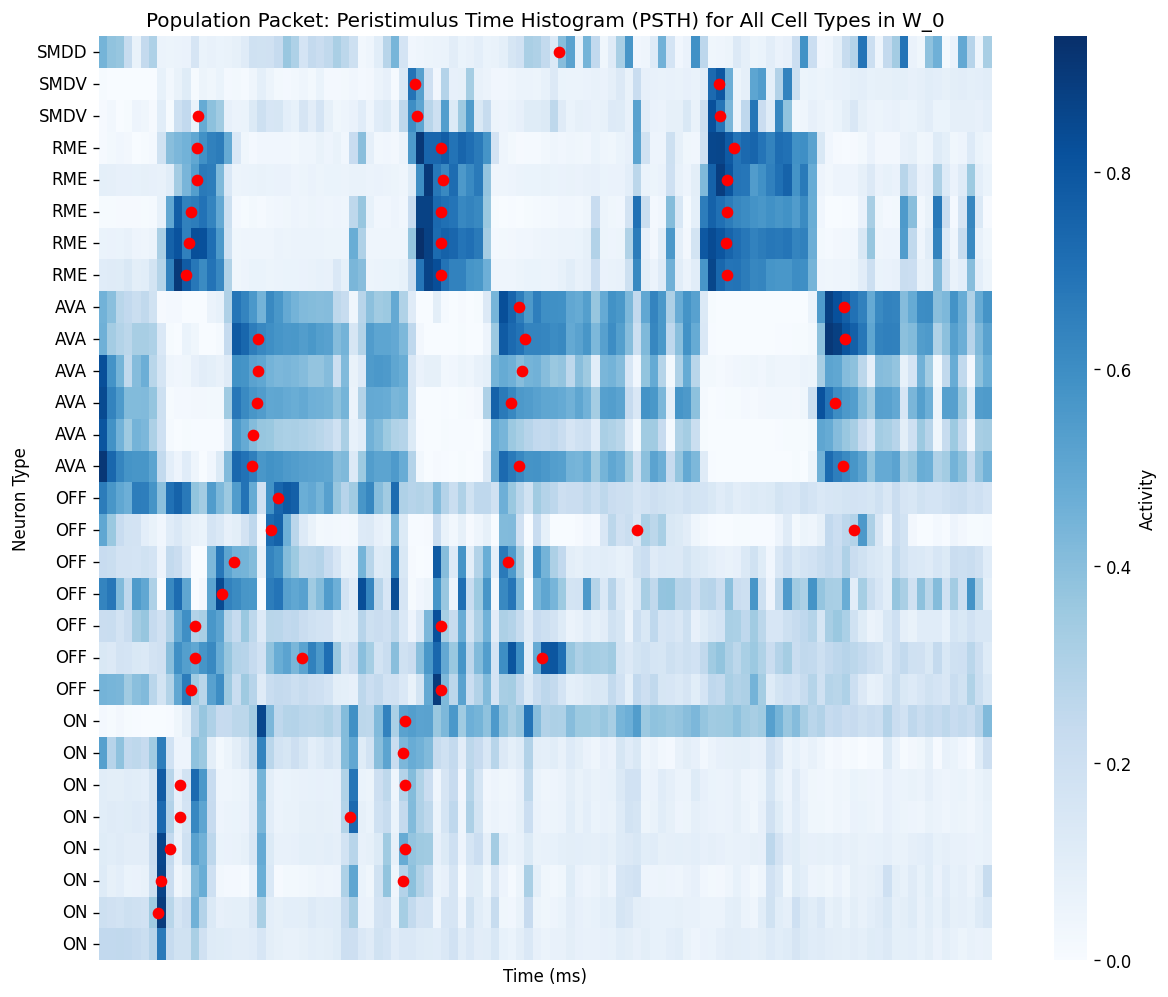

In [18]:


# Select bin size
selected_bin = 15

# Initialize lists to hold combined PSTH data and latency centers, and track y-axis labels
combined_psth_data = []
combined_latency_centers = []
cell_type_labels = []

# Process each cell type individually
for cell_type in cell_types:
    # Filter `all_ws_clustered` for the current cell type and worm ID 0
    filtered_type_df = all_ws_clustered[
        (all_ws_clustered['cell_type'] == cell_type) & (all_ws_clustered['worm_id'] == 0)
    ]

    # Skip if no data is found for the current cell type
    if filtered_type_df.empty:
        print(f"No data found for cell type: {cell_type}")
        continue

    # Initialize temporary lists to store this cell type's data
    psth_data = []
    latency_centers = []
    
    # Process each cell in the filtered DataFrame for the current cell type
    for cell_id in filtered_type_df.index:
        if cell_id in packets and selected_bin in packets[cell_id]:
            averages = np.array(packets[cell_id][selected_bin])
            psth_data.append(averages)

            # Apply Gaussian smoothing to reduce noise
            smoothed_averages = gaussian_filter1d(averages, sigma=2)

            # Find peaks with strict thresholding
            peaks, _ = find_peaks(
                smoothed_averages,
                height=np.mean(smoothed_averages) + np.std(smoothed_averages),
                prominence=0.1,
                width=5
            )

            # Calculate center of mass for each detected peak region
            centers = []
            for peak in peaks:
                region_start = max(0, peak - 5)
                region_end = min(len(smoothed_averages), peak + 5)
                region_indices = np.arange(region_start, region_end)
                packet_averages = averages[region_indices]
                center = np.average(region_indices, weights=packet_averages)
                centers.append(center)

            latency_centers.append(centers)

    # Sort this cell type's data by the first center of mass
    sorted_indices = np.argsort([centers[0] if centers else 0 for centers in latency_centers])
    sorted_psth_data = [psth_data[i] for i in sorted_indices]
    sorted_latency_centers = [latency_centers[i] for i in sorted_indices]
    sorted_labels = [cell_type] * len(sorted_psth_data)

    # Append sorted data to combined lists
    combined_psth_data.extend(sorted_psth_data)
    combined_latency_centers.extend(sorted_latency_centers)
    cell_type_labels.extend(sorted_labels)

# Convert combined data to a 2D array for heatmap plotting
combined_psth_data = np.array(combined_psth_data)

# Plot the heatmap for all cell types in one plot
plt.figure(figsize=(12, 10), dpi=120)
ax = sns.heatmap(combined_psth_data, cmap="Blues", cbar=True, yticklabels=cell_type_labels, xticklabels=False)
plt.gca().invert_yaxis()

plt.xlabel("Time (ms)")
plt.ylabel("Neuron Type")
plt.title("Population Packet: Peristimulus Time Histogram (PSTH) for All Cell Types in W_0")

# Overlay red dots for each center of mass (multiple packets)
for i, centers in enumerate(combined_latency_centers):
    for center in centers:
        plt.plot(center, i + 0.5, 'ro')  # Adjust to place the red dot at the center of each row

# Link colorbar to the heatmap with a smaller size
cbar = ax.collections[0].colorbar
cbar.set_label('Activity')
cbar.ax.set_aspect(30)  # Make the color bar thinner

plt.show()


# Stimulus Overlay

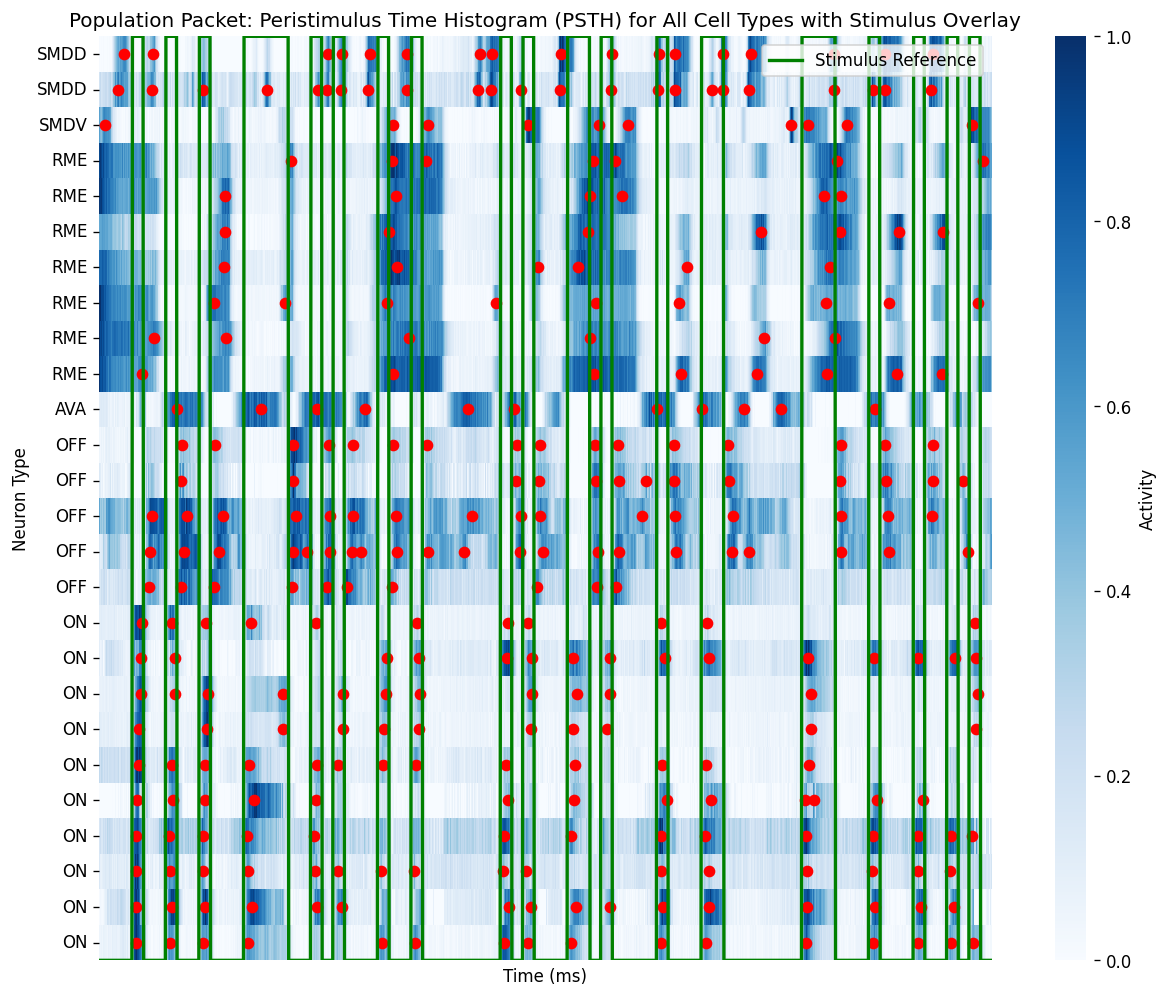

In [28]:
# Assuming `stimulus_array` is a 1D array of length 1600
# This represents the raw stimulus data without binning
stimulus_array = stim_1
# Select bin size
selected_bin = 1

# Initialize lists to hold combined PSTH data and latency centers, and track y-axis labels
combined_psth_data = []
combined_latency_centers = []
cell_type_labels = []

# Process each cell type individually
for cell_type in cell_types:
    # Filter `all_ws_clustered` for the current cell type and worm ID 0
    filtered_type_df = all_ws_clustered[
        (all_ws_clustered['cell_type'] == cell_type) & (all_ws_clustered['worm_id'] == 5)
    ]

    # Skip if no data is found for the current cell type
    if filtered_type_df.empty:
        print(f"No data found for cell type: {cell_type}")
        continue

    # Initialize temporary lists to store this cell type's data
    psth_data = []
    latency_centers = []
    
    # Process each cell in the filtered DataFrame for the current cell type
    for cell_id in filtered_type_df.index:
        if cell_id in packets and selected_bin in packets[cell_id]:
            averages = np.array(packets[cell_id][selected_bin])
            psth_data.append(averages)

            # Apply Gaussian smoothing to reduce noise
            smoothed_averages = gaussian_filter1d(averages, sigma=2)

            # Find peaks with strict thresholding
            peaks, _ = find_peaks(
                smoothed_averages,
                height=np.mean(smoothed_averages) + np.std(smoothed_averages),
                prominence=0.1,
                width=5
            )

            # Calculate center of mass for each detected peak region
            centers = []
            for peak in peaks:
                region_start = max(0, peak - 5)
                region_end = min(len(smoothed_averages), peak + 5)
                region_indices = np.arange(region_start, region_end)
                packet_averages = averages[region_indices]
                center = np.average(region_indices, weights=packet_averages)
                centers.append(center)

            latency_centers.append(centers)

    # Sort this cell type's data by the first center of mass
    sorted_indices = np.argsort([centers[0] if centers else 0 for centers in latency_centers])
    sorted_psth_data = [psth_data[i] for i in sorted_indices]
    sorted_latency_centers = [latency_centers[i] for i in sorted_indices]
    sorted_labels = [cell_type] * len(sorted_psth_data)

    # Append sorted data to combined lists
    combined_psth_data.extend(sorted_psth_data)
    combined_latency_centers.extend(sorted_latency_centers)
    cell_type_labels.extend(sorted_labels)

# Convert combined data to a 2D array for heatmap plotting
combined_psth_data = np.array(combined_psth_data)

# Plot the heatmap for all cell types
plt.figure(figsize=(12, 10), dpi=120)
ax = sns.heatmap(combined_psth_data, cmap="Blues", cbar=True, yticklabels=cell_type_labels, xticklabels=False)
plt.gca().invert_yaxis()

plt.xlabel("Time (ms)")
plt.ylabel("Neuron Type")
plt.title("Population Packet: Peristimulus Time Histogram (PSTH) for All Cell Types with Stimulus Overlay")

# Overlay red dots for each center of mass (multiple packets)
for i, centers in enumerate(combined_latency_centers):
    for center in centers:
        plt.plot(center, i + 0.5, 'ro')  # Adjust to place the red dot at the center of each row

# Scale the stimulus array to fit the entire height of the heatmap
stimulus_y = np.array(stimulus_array) * combined_psth_data.shape[0]  # Scale to match height

# Plot the scaled stimulus array over the heatmap
plt.plot(np.arange(len(stimulus_y)), stimulus_y, color='green', linewidth=2, label='Stimulus Reference')

# Add a legend for the stimulus reference
plt.legend(loc="upper right")

# Adjust colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Activity')
cbar.ax.set_aspect(30)


plt.show()


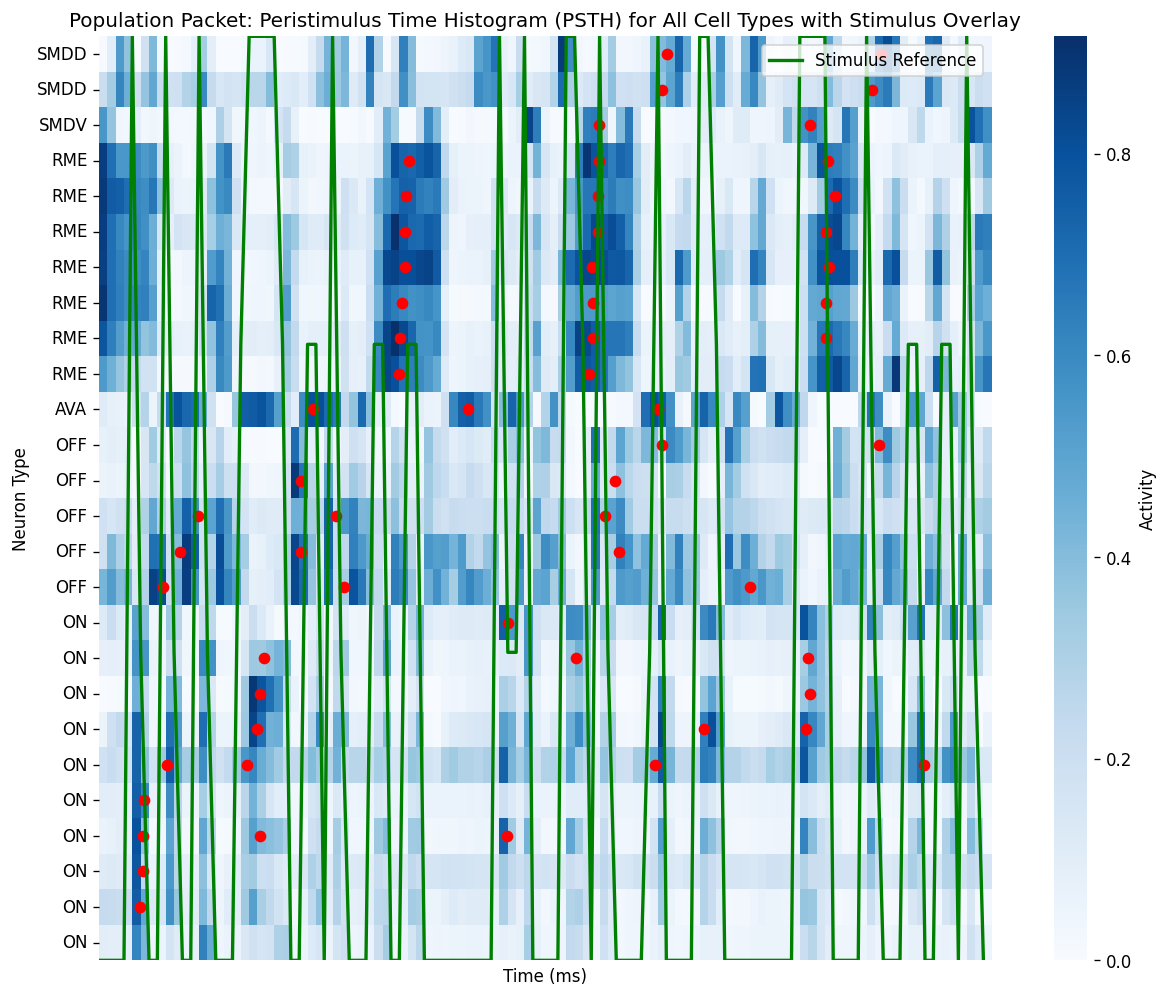

In [30]:
# Assuming `stimulus_array` is a 1D array of length 1600
# This represents the raw stimulus data without binning
stimulus_array = stim_1

binned_stimulus = []
for i in range(0, len(stimulus_array), selected_bin):
    chunk = stimulus_array[i:i+selected_bin]
    binned_stimulus.append(np.mean(chunk))
# Select bin size
selected_bin = 15

# Initialize lists to hold combined PSTH data and latency centers, and track y-axis labels
combined_psth_data = []
combined_latency_centers = []
cell_type_labels = []

# Process each cell type individually
for cell_type in cell_types:
    # Filter `all_ws_clustered` for the current cell type and worm ID 0
    filtered_type_df = all_ws_clustered[
        (all_ws_clustered['cell_type'] == cell_type) & (all_ws_clustered['worm_id'] == 5)
    ]

    # Skip if no data is found for the current cell type
    if filtered_type_df.empty:
        print(f"No data found for cell type: {cell_type}")
        continue

    # Initialize temporary lists to store this cell type's data
    psth_data = []
    latency_centers = []
    
    # Process each cell in the filtered DataFrame for the current cell type
    for cell_id in filtered_type_df.index:
        if cell_id in packets and selected_bin in packets[cell_id]:
            averages = np.array(packets[cell_id][selected_bin])
            psth_data.append(averages)

            # Apply Gaussian smoothing to reduce noise
            smoothed_averages = gaussian_filter1d(averages, sigma=2)

            # Find peaks with strict thresholding
            peaks, _ = find_peaks(
                smoothed_averages,
                height=np.mean(smoothed_averages) + np.std(smoothed_averages),
                prominence=0.1,
                width=5
            )

            # Calculate center of mass for each detected peak region
            centers = []
            for peak in peaks:
                region_start = max(0, peak - 5)
                region_end = min(len(smoothed_averages), peak + 5)
                region_indices = np.arange(region_start, region_end)
                packet_averages = averages[region_indices]
                center = np.average(region_indices, weights=packet_averages)
                centers.append(center)

            latency_centers.append(centers)

    # Sort this cell type's data by the first center of mass
    sorted_indices = np.argsort([centers[0] if centers else 0 for centers in latency_centers])
    sorted_psth_data = [psth_data[i] for i in sorted_indices]
    sorted_latency_centers = [latency_centers[i] for i in sorted_indices]
    sorted_labels = [cell_type] * len(sorted_psth_data)

    # Append sorted data to combined lists
    combined_psth_data.extend(sorted_psth_data)
    combined_latency_centers.extend(sorted_latency_centers)
    cell_type_labels.extend(sorted_labels)

# Convert combined data to a 2D array for heatmap plotting
combined_psth_data = np.array(combined_psth_data)

# Plot the heatmap for all cell types
plt.figure(figsize=(12, 10), dpi=120)
ax = sns.heatmap(combined_psth_data, cmap="Blues", cbar=True, yticklabels=cell_type_labels, xticklabels=False)
plt.gca().invert_yaxis()

plt.xlabel("Time (ms)")
plt.ylabel("Neuron Type")
plt.title("Population Packet: Peristimulus Time Histogram (PSTH) for All Cell Types with Stimulus Overlay")

# Overlay red dots for each center of mass (multiple packets)
for i, centers in enumerate(combined_latency_centers):
    for center in centers:
        plt.plot(center, i + 0.5, 'ro')  # Adjust to place the red dot at the center of each row

stimulus_x = np.arange(len(binned_stimulus))
stimulus_y = np.array(binned_stimulus) * combined_psth_data.shape[0]
# Plot the binned stimulus array over the heatmap
plt.plot(stimulus_x, stimulus_y, color='green', linewidth=2, label='Stimulus Reference')


# Add a legend for the stimulus reference
plt.legend(loc="upper right")

# Adjust colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Activity')
cbar.ax.set_aspect(30)


plt.show()


# packets

In [10]:
#dictionary with each cell from from all_ws_clustered and its binned avg activities
packets = defaultdict(lambda: defaultdict(list))

bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for _, row in all_ws_clustered.iloc[: ,: -4 ].iterrows():
    for bin_size in bins :
        for i in range (0, len(row), bin_size):
            chunk = row[i:i+bin_size]
            averages = np.mean(chunk)
            packets[_][bin_size].append(averages)







In [11]:
color_discrete_map={'ON': 'teal', 'OFF': '#FF8C00', 'AVA': 'red', 'RME': 'blue', 'SMDV': 'purple', 'SMDD': 'yellow'}

In [12]:
on_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'ON'].tolist()
off_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'OFF'].tolist()
ava_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'AVA'].tolist()
rme_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'RME'].tolist()
smdd_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'SMDD'].tolist()
smdv_indices = all_ws_clustered.index[all_ws_clustered['cell_type'] == 'SMDV'].tolist()

In [13]:
#average activity for each cell type
on_avg = all_ws_clustered.iloc[on_indices, : -4].mean()
off_avg = all_ws_clustered.iloc[off_indices, : -4].mean()
ava_avg = all_ws_clustered.iloc[ava_indices, : -4].mean()
rme_avg = all_ws_clustered.iloc[rme_indices, : -4].mean()
smdd_avg = all_ws_clustered.iloc[smdd_indices, : -4].mean()
smdv_avg = all_ws_clustered.iloc[smdv_indices, : -4].mean()

In [53]:
on_avg.shape

(1600,)

In [18]:
# concatenate averages and convert to dataframe
avg_activities = (pd.concat([on_avg, off_avg, ava_avg, rme_avg, smdv_avg, smdd_avg ], axis=1)).T

In [19]:
avg_activities.shape

(6, 1600)

In [20]:
#avergae packets dictionary
avg_packets = defaultdict(lambda: defaultdict(list))


bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for _, row in avg_activities.iterrows():
    for bin_size in bins :
        for i in range (0, len(row), bin_size):
            chunk = row[i:i+bin_size]
            averages = np.mean(chunk)
            avg_packets[_][bin_size].append(averages)



# Plotting Cluster Averages

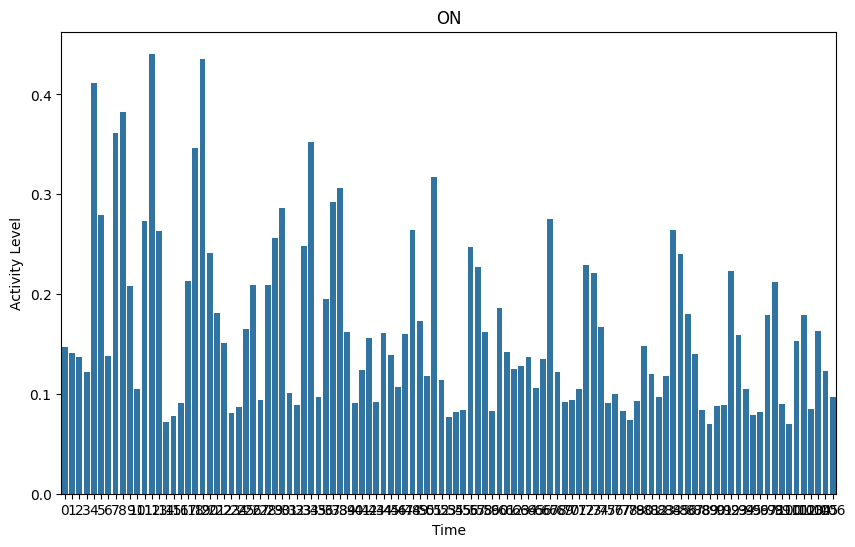

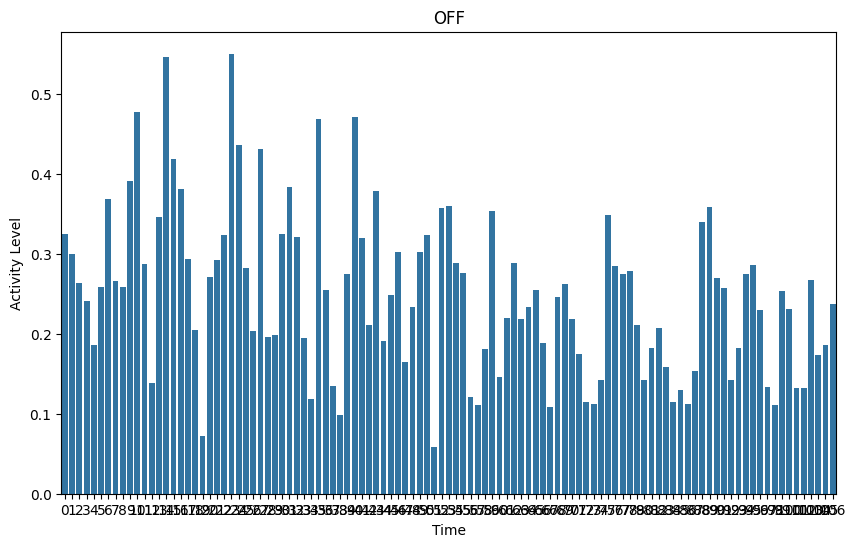

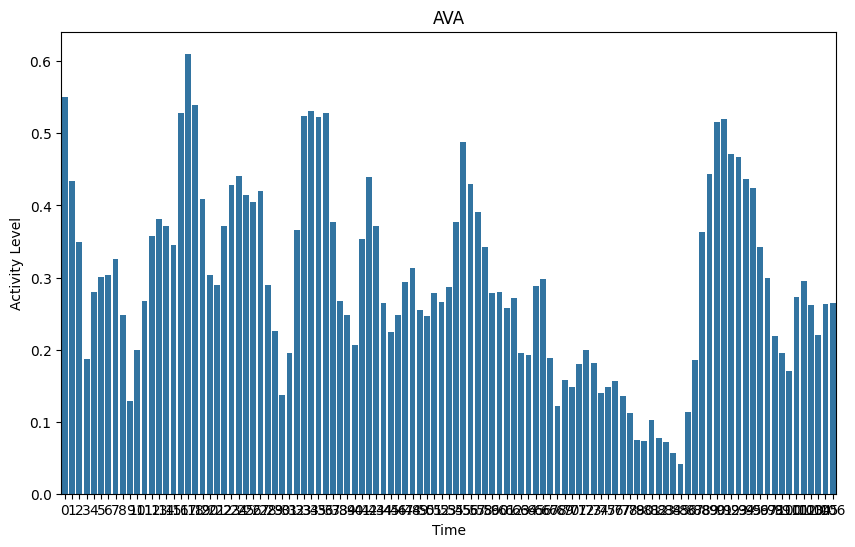

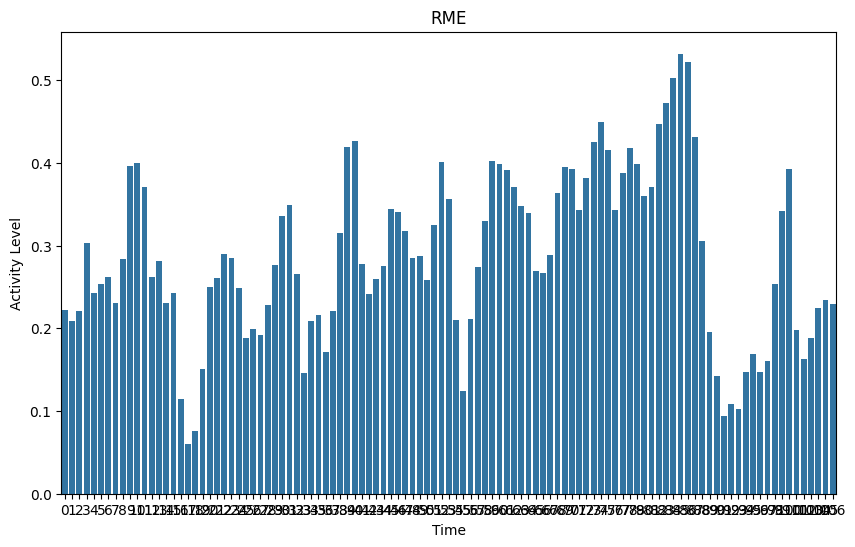

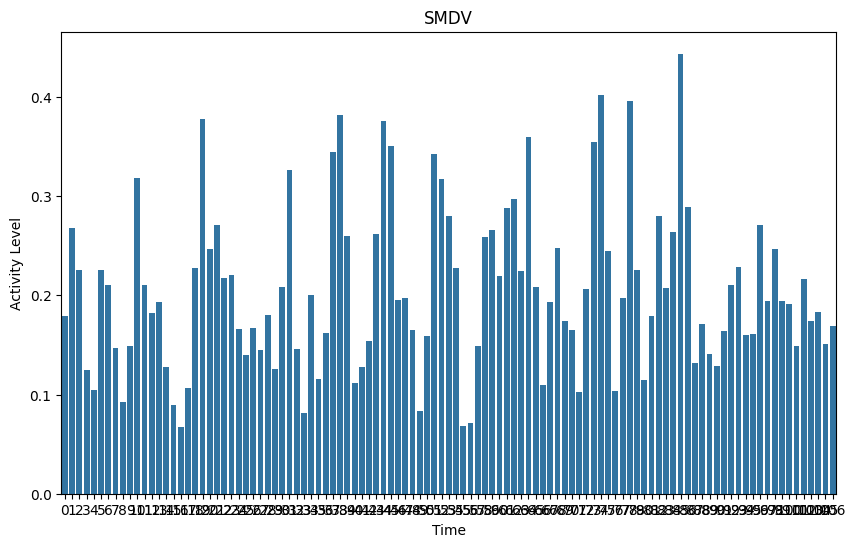

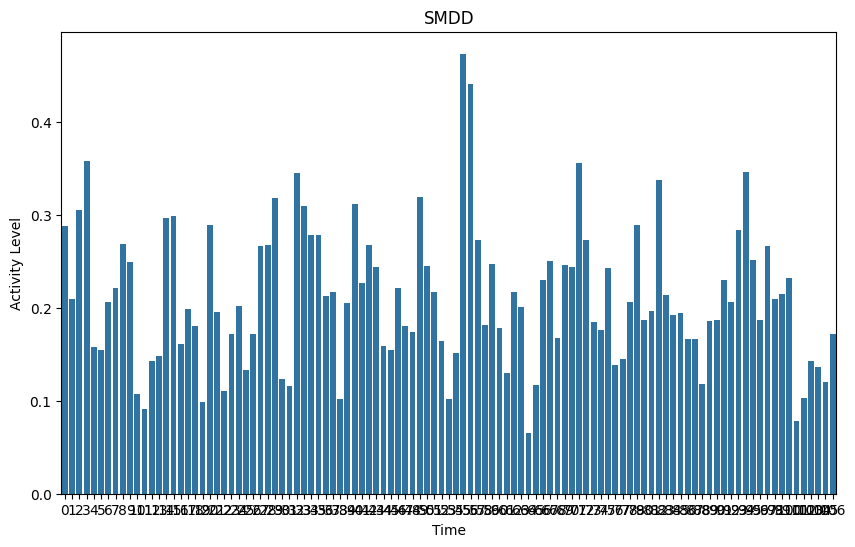

In [21]:
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])
#options: 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
selected_bin = 15
for i, (outer_keys, inner_keys) in enumerate(avg_packets.items()):
    if selected_bin in inner_keys:
        averages = inner_keys[selected_bin]
        plt.figure(figsize=(10, 6))
        sns.barplot(x=range(0, len(averages)), y=averages)
        plt.ylabel('Activity Level')
        plt.xlabel('Time')
        plt.title(titles[i])
        plt.show()

# Plotting Individual Cells

In [ ]:

#select bin size and plot
#options: 5, 10, 15, 20, 25, 30, 35, 40, 45, 50

titles = all_ws_clustered['cell_type'].values

selected_bin = 5
for i, (outer_keys, inner_keys) in enumerate(packets.items()):
    if selected_bin in inner_keys:
        averages = inner_keys[selected_bin]
        plt.figure(figsize=(10, 6))
        sns.barplot(x=range(0, len(averages)), y=averages)
        plt.ylabel('Activity Level')
        plt.xlabel('Time')
        plt.title(titles[i])
        plt.show()




# Cluster Averages By Worm

In [62]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy,activity_sums
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,5.150506,197.016617
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,5.448032,182.980127
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,5.481223,210.802331
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,5.231055,197.424127
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,5.975454,253.449246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,6.581221,462.153412
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,5.720223,310.039398
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,6.464723,414.342537
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,5.613714,258.719369


In [23]:
# worm 0 clustred by cell type

def make_dict(worm_id):
    # Get indices for each cell type
    on_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'ON') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    off_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'OFF') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    ava_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'AVA') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    rme_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'RME') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    smdd_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'SMDD') & (all_ws_clustered['worm_id'] == worm_id)].tolist()
    smdv_indices = all_ws_clustered.index[(all_ws_clustered['cell_type'] == 'SMDV') & (all_ws_clustered['worm_id'] == worm_id)].tolist()

    # Calculate average activity for each cell type
    on_avg = all_ws_clustered.iloc[on_indices, :-4].mean()
    off_avg = all_ws_clustered.iloc[off_indices, :-4].mean()
    ava_avg = all_ws_clustered.iloc[ava_indices, :-4].mean()
    rme_avg = all_ws_clustered.iloc[rme_indices, :-4].mean()
    smdd_avg = all_ws_clustered.iloc[smdd_indices, :-4].mean()
    smdv_avg = all_ws_clustered.iloc[smdv_indices, :-4].mean()

    # Concatenate averages and convert to dataframe
    avg_activities = (pd.concat([on_avg, off_avg, ava_avg, rme_avg, smdv_avg, smdd_avg], axis=1)).T

    avg_activities = pd.DataFrame({
        'ON': on_avg,
        'OFF': off_avg,
        'AVA': ava_avg,
        'RME': rme_avg,
        'SMDV': smdv_avg,
        'SMDD': smdd_avg
    }).T

        #avergae packets dictionary
    avg_packets = defaultdict(lambda: defaultdict(list))


    bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    for _, row in avg_activities.iterrows():
        for bin_size in bins :
            for i in range (0, len(row), bin_size):
                chunk = row[i:i+bin_size]
                averages = np.mean(chunk)
                avg_packets[_][bin_size].append(averages) 
    avg_packets 
    return avg_packets 

 

In [24]:
avg_packets_0 = make_dict(0)

In [25]:
avg_packets_0['ON'].keys()

dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

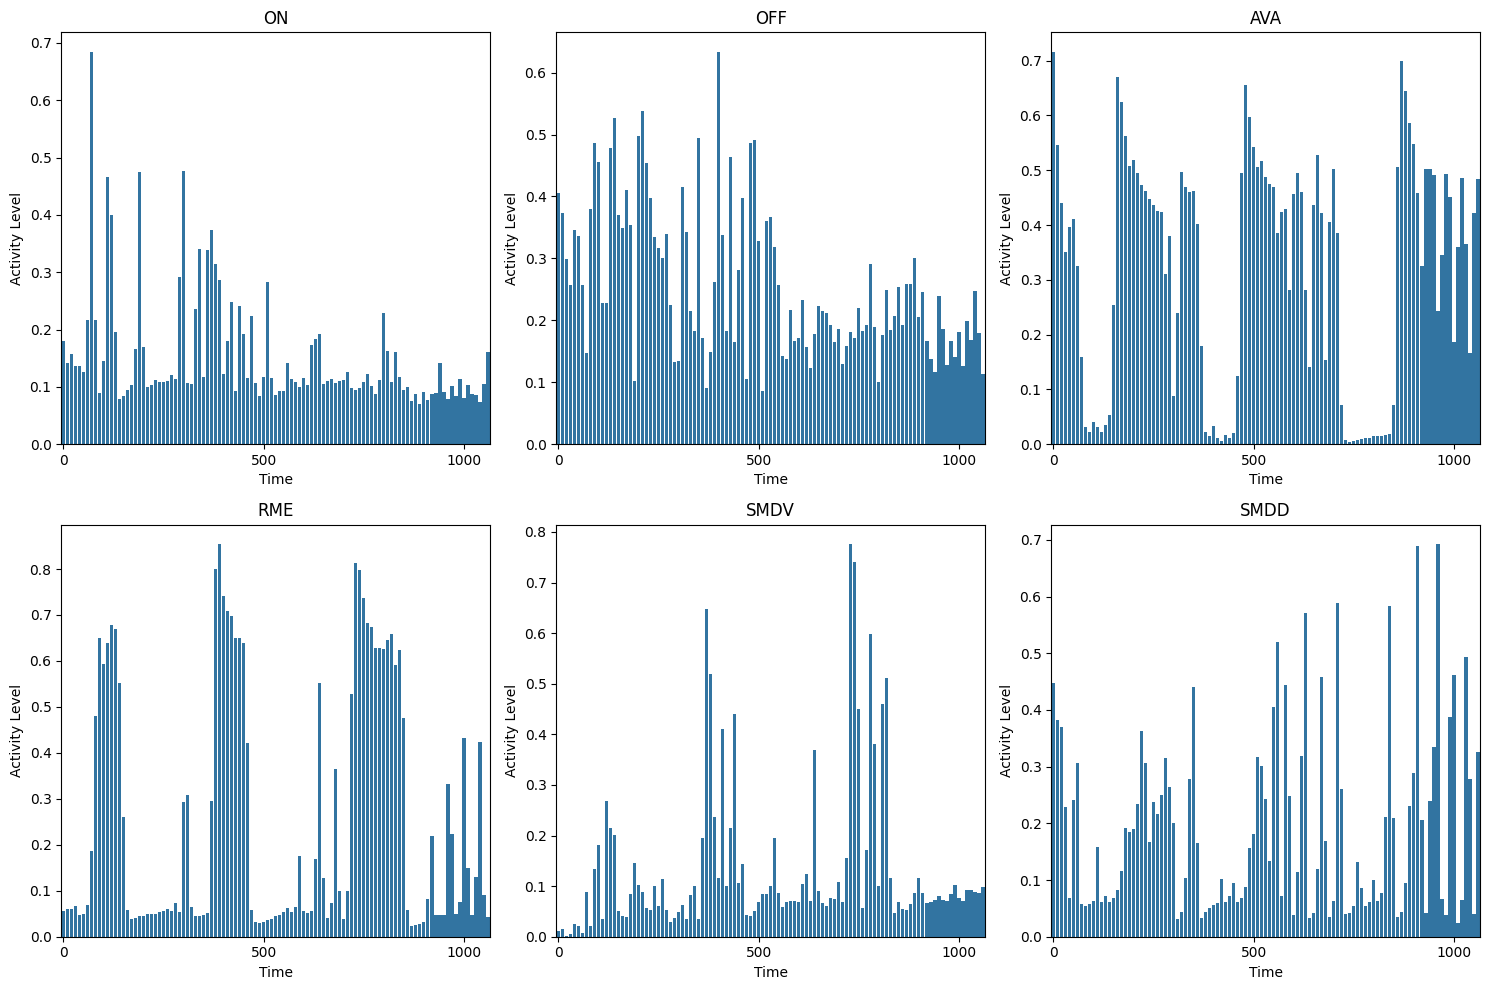

In [89]:
avg_packets_0 = make_dict(0)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 15

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_0.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])
        times = np.arange(0, len(averages))
        ticks = times  # Use the DataFrame's index or a custom range
#tick adjustment depends on how the data collection was done
        adjusted_ticks = (ticks * 15) / 1.5
        axes[i].set_xticks(ticks=ticks[:: 50])
        axes[i].set_xticklabels(labels=[f'{int(tick):.0f}' for tick in adjusted_ticks[:: 50]])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
#bin histogram of values for each cell type:
avg_packets_0 = make_dict(0)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 15

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_0.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.histplot(averages, bins=60, ax=axes[i], kde=True) 
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])
        times = np.arange(0, len(averages))
#         ticks = times  # Use the DataFrame's index or a custom range
# #tick adjustment depends on how the data collection was done
#         adjusted_ticks = (ticks * 10) / 1.5
#         axes[i].set_xticks(ticks=ticks[:: 50])
#         axes[i].set_xticklabels(labels=[f'{int(tick):.0f}' for tick in adjusted_ticks[:: 50]])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [91]:
#analyze bimodal distribution quantitatively
for i, (outer_key, inner_dict) in enumerate(avg_packets_0.items()):
    if selected_bin in inner_dict:
        averages = np.array(inner_dict[selected_bin])
        
        # Find peaks in the distribution
        peaks, _ = find_peaks(averages, threshold = 0.1)  # You can adjust the `height` parameter to control peak sensitivity
        print(f"Dataset: {titles[i]}, Number of Peaks: {len(peaks)}")



Dataset: ON, Number of Peaks: 6
Dataset: OFF, Number of Peaks: 4
Dataset: AVA, Number of Peaks: 1
Dataset: RME, Number of Peaks: 7
Dataset: SMDV, Number of Peaks: 5
Dataset: SMDD, Number of Peaks: 10


# packet size

In [35]:
ON_5_0= avg_packets_0['ON'][5]

[0.2191452234537934,
 0.15847679882568408,
 0.1628945680852245,
 0.1262635128553146,
 0.13809557069479608,
 0.15880422235880637,
 0.15594984263403713,
 0.1443256962464414,
 0.1728060747269315,
 0.14271127431622013,
 0.13128083870464563,
 0.1328318601882874,
 0.1320524453217839,
 0.13829383609791016,
 0.136950145082479,
 0.12516677319072683,
 0.13190833870984459,
 0.12324232782950155,
 0.13504860748500436,
 0.1393469194549201,
 0.37577237962631926,
 0.6646126942076147,
 0.7079617643096323,
 0.680157542971449,
 0.3862578446527533,
 0.15652005509830175,
 0.10510348370427017,
 0.08758892906696376,
 0.09084391481513172,
 0.08713208054794082,
 0.08834523498213578,
 0.0894241148725978,
 0.25513605761936886,
 0.4676706466215643,
 0.4624859157077627,
 0.46702797128809054,
 0.43756694088704134,
 0.38957144903245533,
 0.3717280705993336,
 0.3357514553401029,
 0.1708326576136055,
 0.08106494176806094,
 0.07255558020613442,
 0.0817940833230872,
 0.08146666836366988,
 0.0801168207603292,
 0.08616727

## histogram of packet sizes

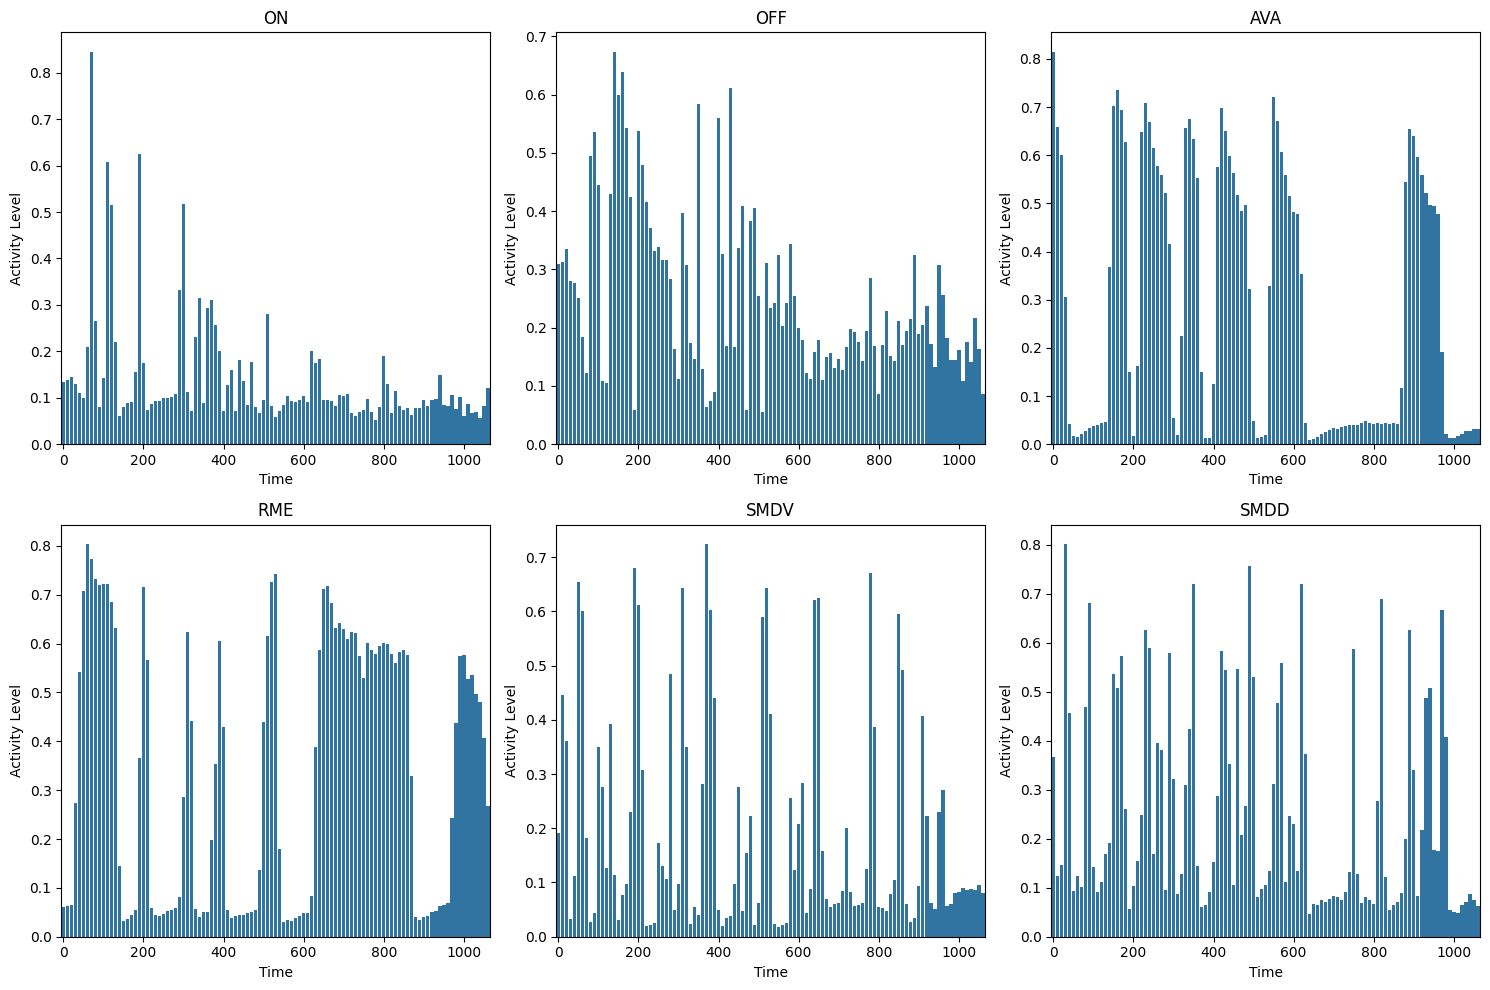

In [92]:
avg_packets_1 = make_dict(1)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 15

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_1.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])
        times = np.arange(0, len(averages))
        ticks = times  # Use the DataFrame's index or a custom range
#tick adjustment depends on how the data collection was done
        adjusted_ticks = (ticks * 15) / 1.5
        axes[i].set_xticks(ticks=ticks[:: 20])
        axes[i].set_xticklabels(labels=[f'{int(tick):.0f}' for tick in adjusted_ticks[:: 20]])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [93]:
#analyze bimodal distribution quantitatively
for i, (outer_key, inner_dict) in enumerate(avg_packets_1.items()):
    if selected_bin in inner_dict:
        averages = np.array(inner_dict[selected_bin])
        
        # Find peaks in the distribution
        peaks, _ = find_peaks(averages, height=.7)  # You can adjust the `height` parameter to control peak sensitivity
        print(f"Dataset: {titles[i]}, Number of Peaks: {len(peaks)}")

Dataset: ON, Number of Peaks: 1
Dataset: OFF, Number of Peaks: 0
Dataset: AVA, Number of Peaks: 3
Dataset: RME, Number of Peaks: 5
Dataset: SMDV, Number of Peaks: 1
Dataset: SMDD, Number of Peaks: 4


In [94]:

# titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# # Bin size to plot
# selected_bin = 15

# # Number of subplots (based on the number of titles)
# num_plots = len(titles)

# # Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# # Flatten the axes array for easy indexing
# axes = axes.flatten()

# # Iterate over the dictionary and plot each subplot
# for i, (outer_key, inner_dict) in enumerate(avg_packets_1.items()):
#     if selected_bin in inner_dict:
#         averages = inner_dict[selected_bin]
#         sns.histplot(averages, bins=60, ax=axes[i], kde=True) 
#         axes[i].set_ylabel('Bin Count')
#         axes[i].set_xlabel('Calcium Activity')
#         axes[i].set_title(titles[i])
#         times = np.arange(0, len(averages))
# #         ticks = times  # Use the DataFrame's index or a custom range
# # #tick adjustment depends on how the data collection was done
# #         adjusted_ticks = (ticks * 10) / 1.5
# #         axes[i].set_xticks(ticks=ticks[:: 50])
# #         axes[i].set_xticklabels(labels=[f'{int(tick):.0f}' for tick in adjusted_ticks[:: 50]])
# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

In [80]:
#analyze bimodal distribution quantitatively
for i, (outer_key, inner_dict) in enumerate(avg_packets_1.items()):
    if selected_bin in inner_dict:
        averages = np.array(inner_dict[selected_bin])
        
        # Find peaks in the distribution
        peaks, _ = find_peaks(averages, height=.7)  # You can adjust the `height` parameter to control peak sensitivity
        print(f"Dataset: {titles[i]}, Number of Peaks: {len(peaks)}")

Dataset: ON, Number of Peaks: 1
Dataset: OFF, Number of Peaks: 0
Dataset: AVA, Number of Peaks: 3
Dataset: RME, Number of Peaks: 5
Dataset: SMDV, Number of Peaks: 1
Dataset: SMDD, Number of Peaks: 4


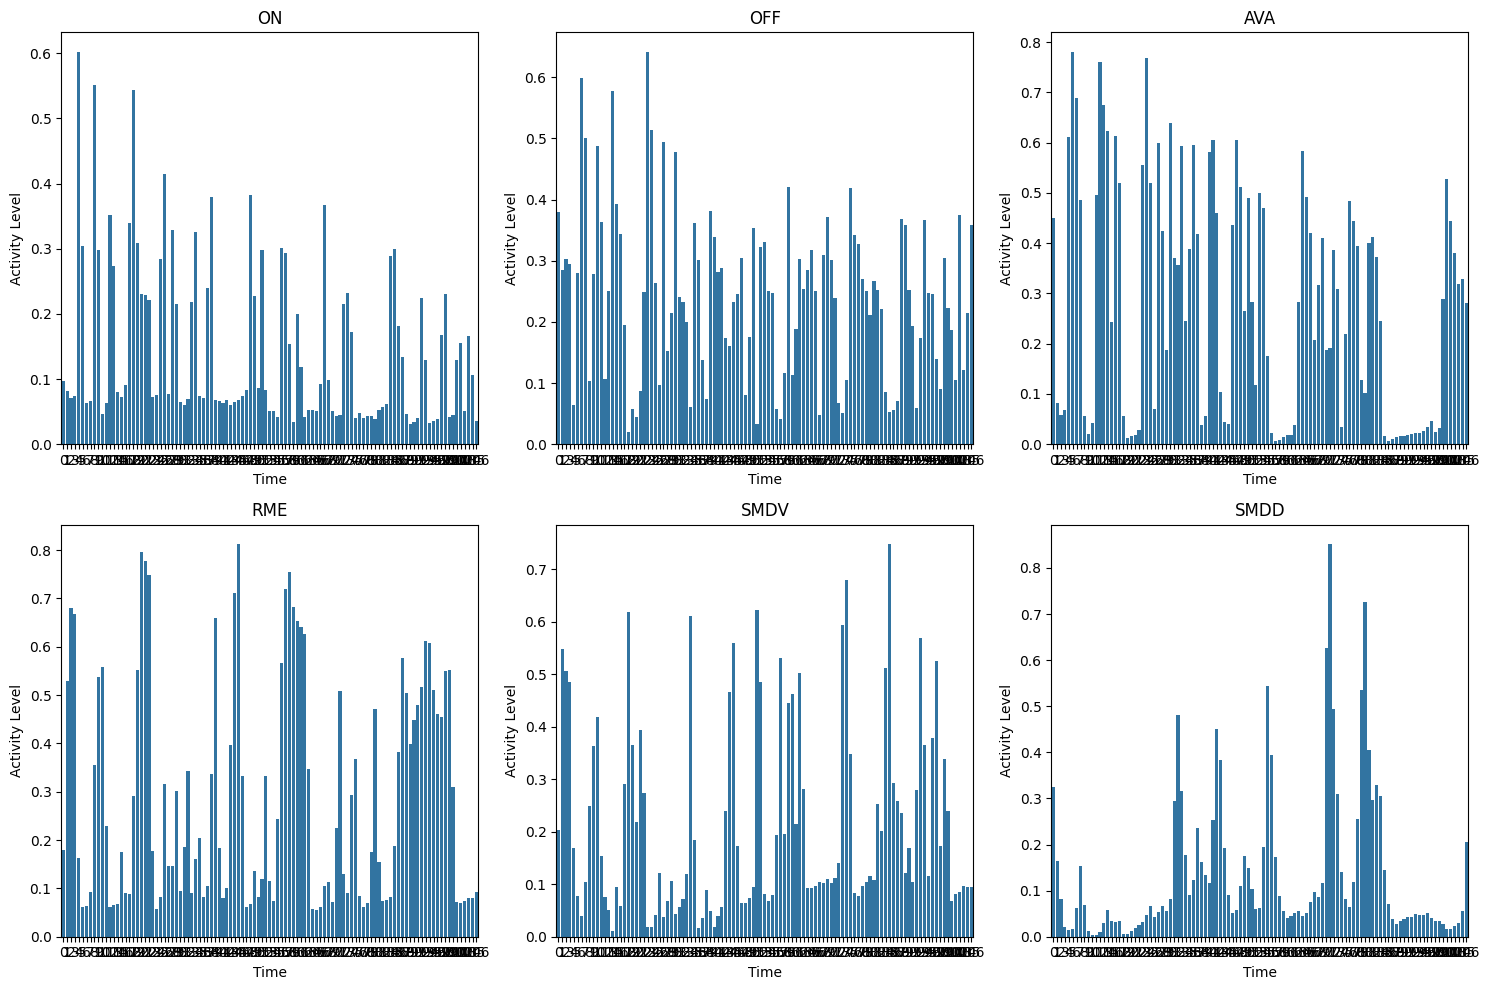

In [76]:
avg_packets_2 = make_dict(2)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 15

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_2.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


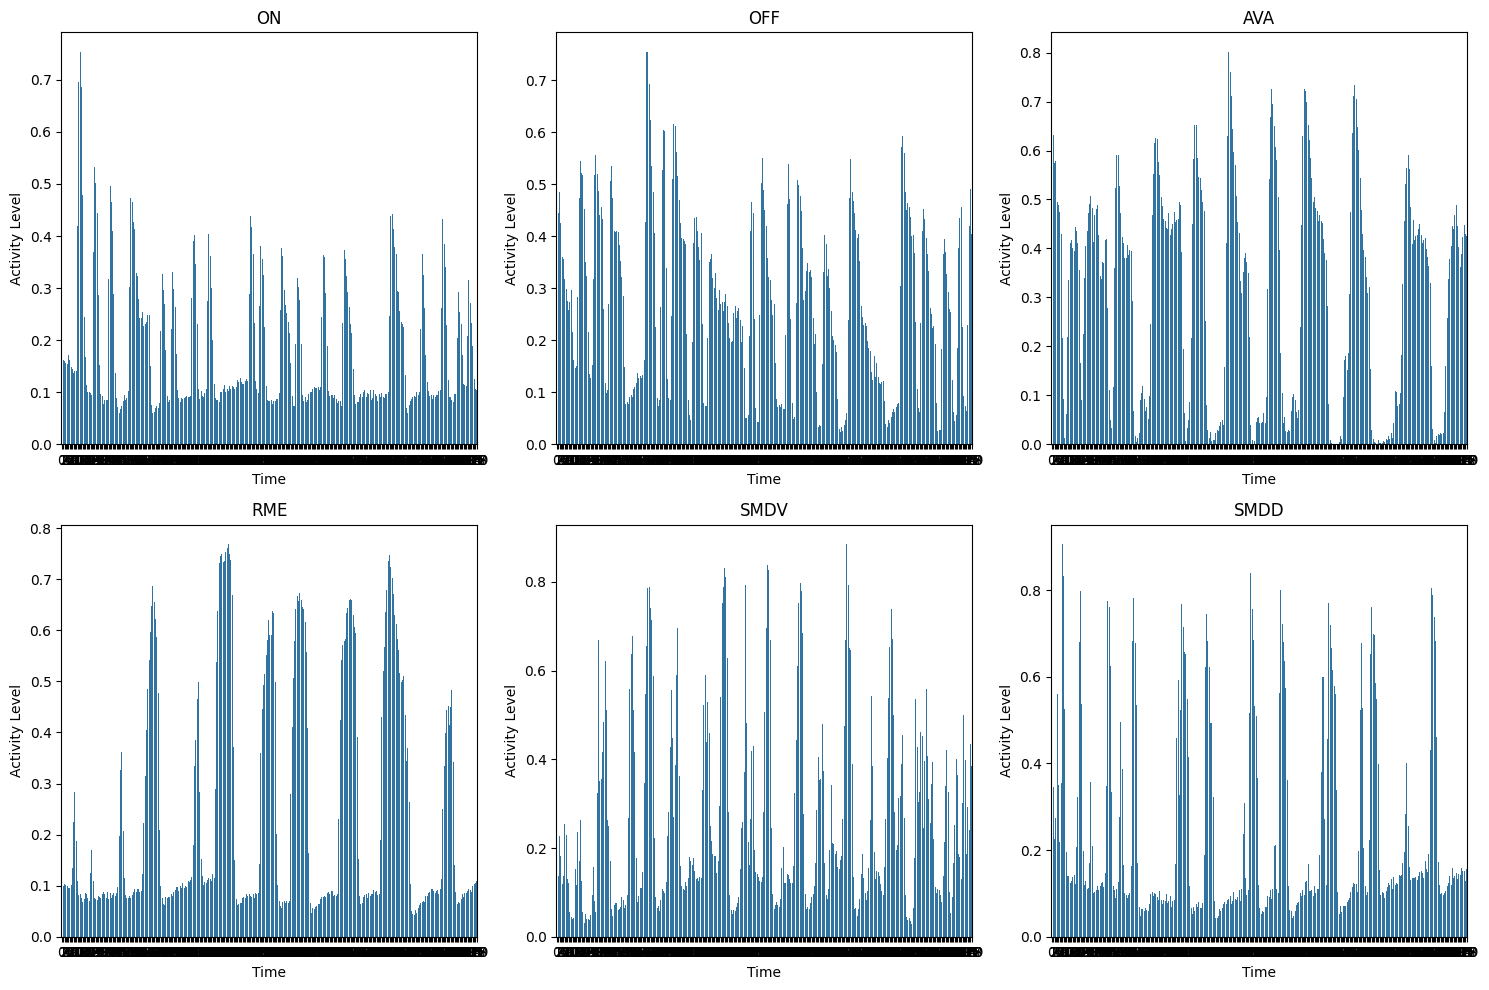

In [113]:
avg_packets_3 = make_dict(3)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 5

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_3.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

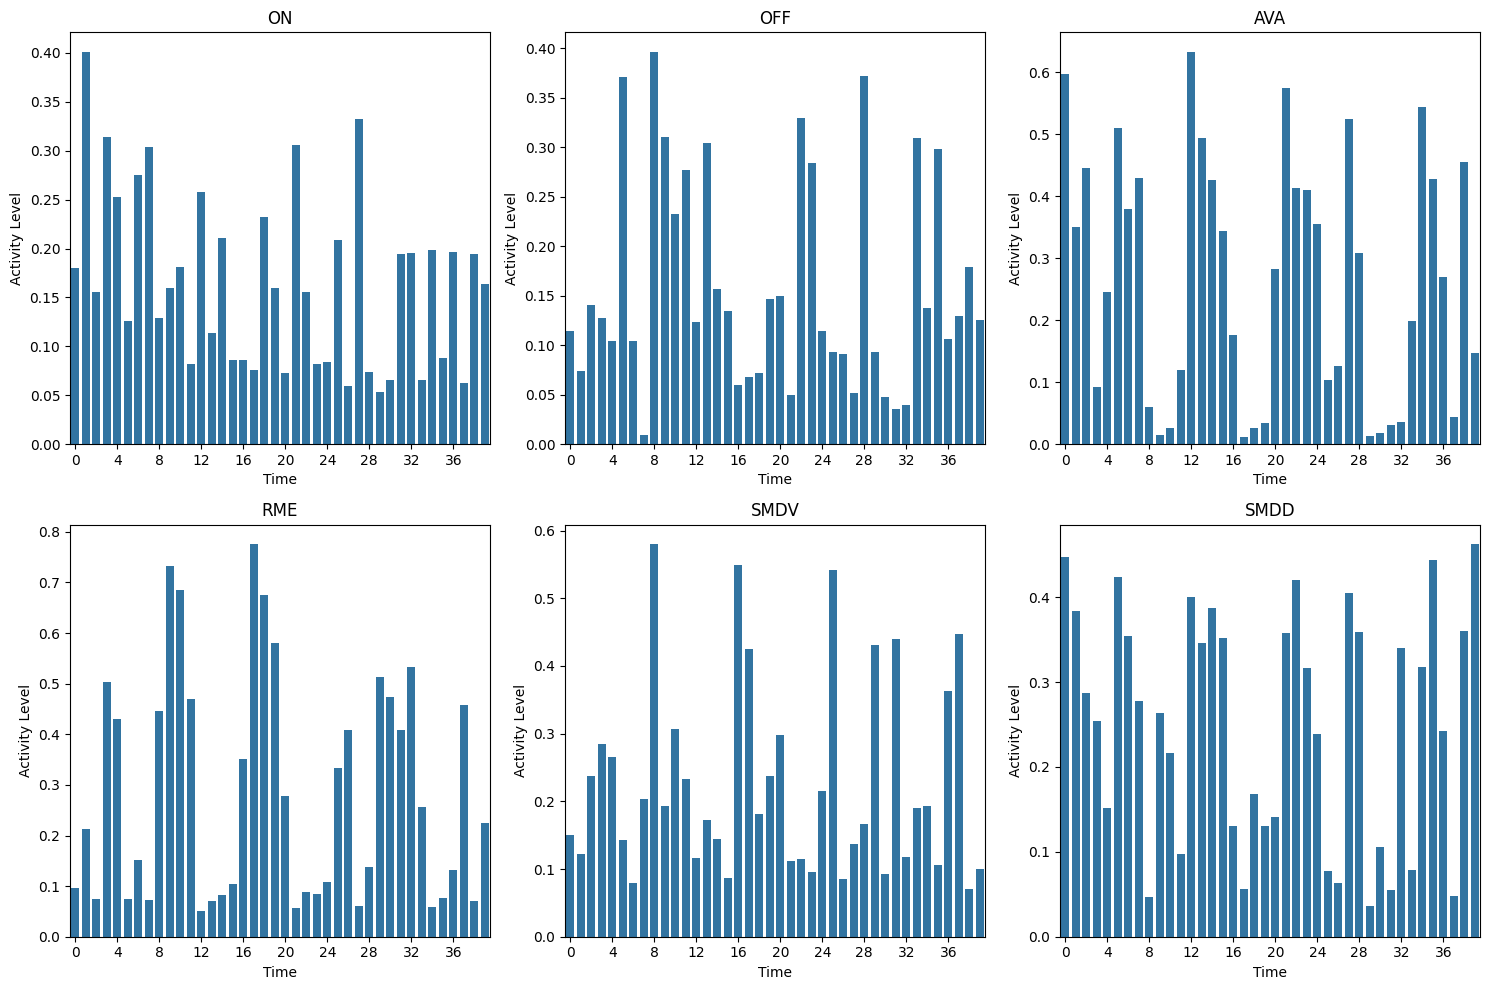

In [122]:
avg_packets_4 = make_dict(4)
titles = np.array(['ON', 'OFF', 'AVA', 'RME', 'SMDV', 'SMDD'])

# Bin size to plot
selected_bin = 40

# Number of subplots (based on the number of titles)
num_plots = len(titles)

# Create subplots: Adjust the layout as necessary (e.g., 2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the dictionary and plot each subplot
for i, (outer_key, inner_dict) in enumerate(avg_packets_4.items()):
    if selected_bin in inner_dict:
        averages = inner_dict[selected_bin]
        sns.barplot(x=range(0, len(averages)), y=averages, ax=axes[i])
        axes[i].set_ylabel('Activity Level')
        axes[i].set_xlabel('Time')
        axes[i].set_title(titles[i])


        xticks = np.arange(0, len(averages), max(1, len(averages)//10))  # Adjust this to control tick density
        axes[i].set_xticks(xticks)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()